## Figure 7: $50K Cancellation By Net Worth, Race

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [1]:
ssc install dubois

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.


In [2]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [3]:
qui {
    clear
    set obs 300
gen obs = _n
    ** numerator is value of student debt for a category. 
    ** denominator is student debt value of reference category
local black010 = round(169-(20727.48/20727.48)*96)
local white010 = round(169-(17013.13/20727.48)*96)
local latinx010 = round(169-(12616.59/20727.48)*96)
local top7080 = round(169-(1564.879/20727.48)*96)
local top8090 = round(169-(1440.62/20727.48)*96)
local top90100 = round(169-(732.84/20727.48)*96)
}

In [4]:
qui {

gen textx = .
gen texty = .
gen textt = ""
replace textx = 0 in 1
replace texty = 2.735 in 1
replace textt = "Bottom 10% for wealth, Black - $20,727" in 6
replace textx = 0 in 2
replace texty = 2.62 in 2
replace textt = "Bottom 10% for wealth, white - $17,013" in 5
replace textx = 0 in 3
replace texty = 2.51 in 3
replace textt = "Bottom 10% for wealth, Latinx - $12,617" in 4
replace textx = 0 in 4
replace texty = 2.4 in 4
replace textt = "70th to 80th wealth perctile, all races - $1,565" in 3
replace textx = 0 in 5
replace texty = 2.29 in 5
replace textt = "80th to 90th wealth percentile, all races - $1,441" in 2
replace textx = 0 in 6
replace texty = 2.18 in 6
replace textt = "Top 10% for wealth, all races - $733" in 1
}

In [5]:
qui {

gen line1 = 0.50 + (_n / 100) in `black010'/169     // 0.5 = scaling factor 100 = space between the spirals 73 = inside point, 169 = top of spiral
gen line2 = 0.61 + (_n / 100) in `white010'/169
gen line3 = 0.73 + (_n / 100) in `latinx010'/169
gen line4 = 0.84 + (_n / 100) in `top7080'/169
gen line5 = 0.95 + (_n / 100) in `top8090'/169
gen line6 = 1.06 + (_n / 100) in `top90100'/169
gen angle = _n * 2 * _pi / 52   // adding +/- changes the direction of the spiral
gen x1 = (line1 * cos(angle)) 
gen y1 = (line1 * sin(angle))
gen x2 = (line2 * cos(angle)) 
gen y2 = (line2 * sin(angle))
gen x3 = (line3 * cos(angle)) 
gen y3 = (line3 * sin(angle))
gen x4 = (line4 * cos(angle)) 
gen y4 = (line4 * sin(angle))
gen x5 = (line5 * cos(angle)) 
gen y5 = (line5 * sin(angle))
gen x6 = (line6 * cos(angle)) 
gen y6 = (line6 * sin(angle))
}

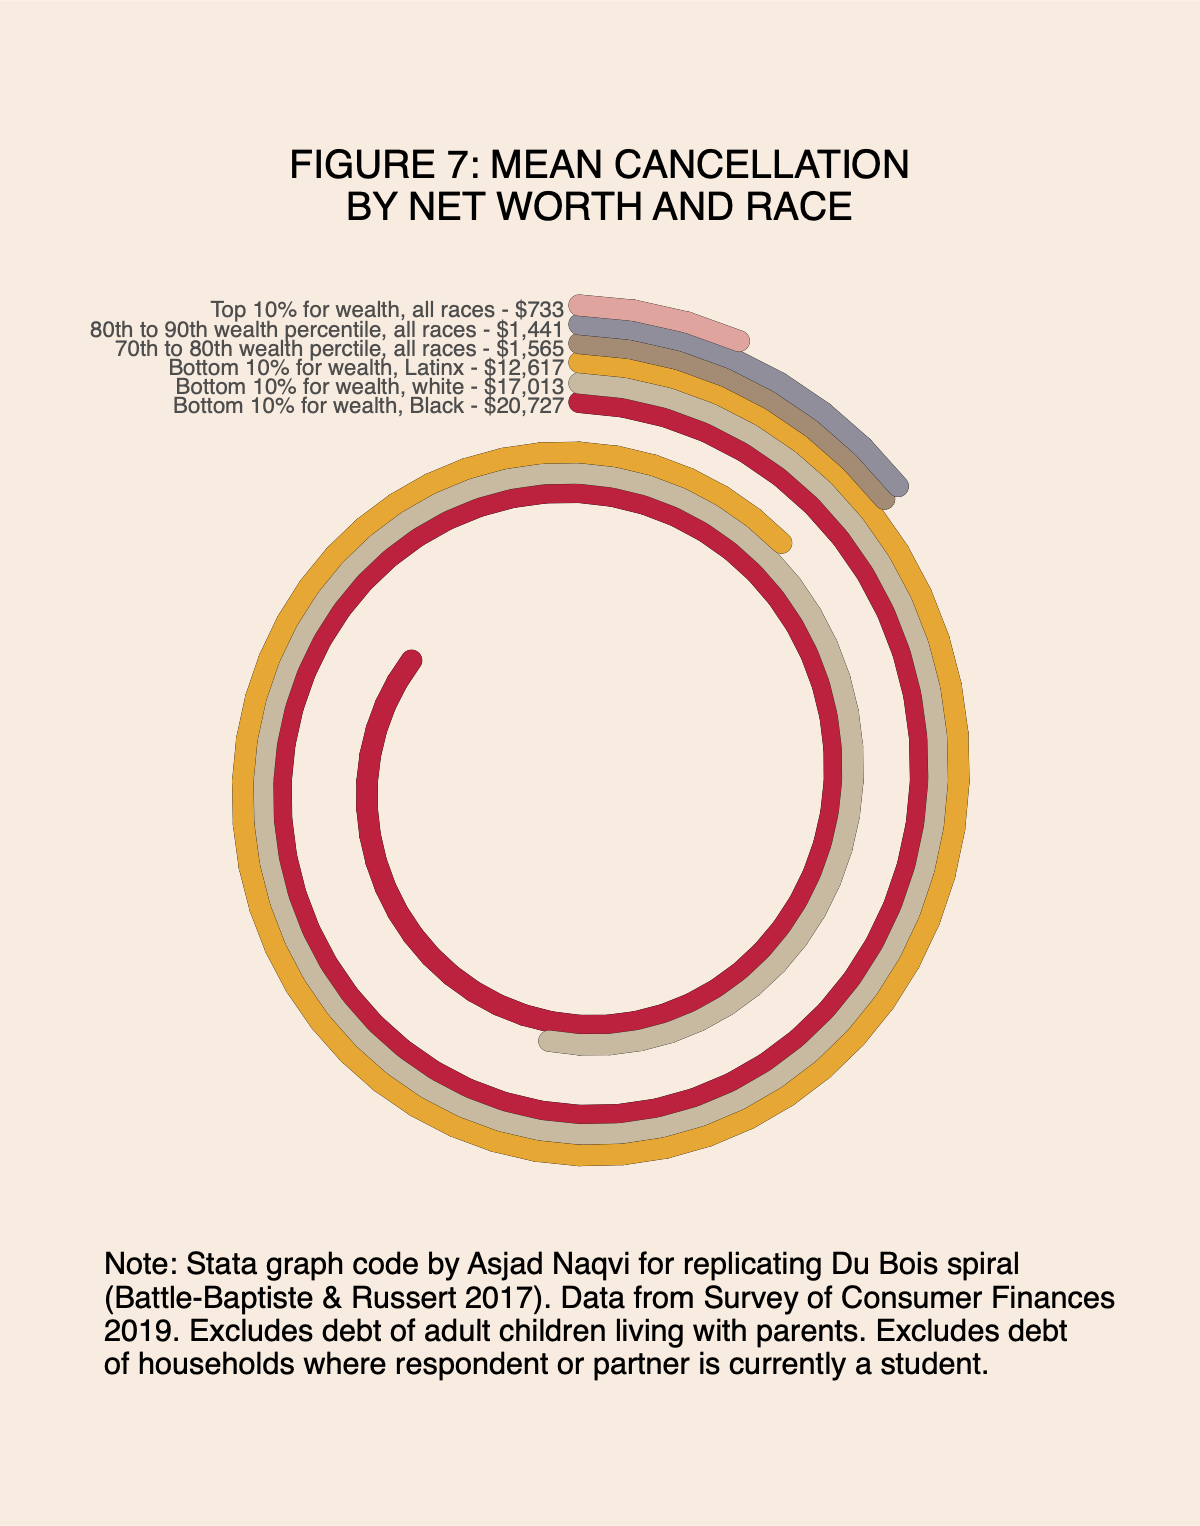




(file /Users/Charlie/Dropbox/SCF Student Debt 2021/replication/figures/f7_spiral
> cancelnetworthrace.pdf written in PDF format)


In [6]:
twoway ///
   (line y1 x1, lc(black)  lp(solid) lw(1.8)) ///
   (line y1 x1, lc("202 55 78")  lp(solid) lw(1.77)) /// 
   (line y2 x2, lc(black)  lp(solid) lw(1.8)) ///
   (line y2 x2, lc("210 198 176")  lp(solid) lw(1.77)) ///  
   (line y3 x3, lc(black) lp(solid) lw(1.8)) ///
   (line y3 x3, lc("237 181 67") lp(solid) lw(1.77)) ///
   (line y4 x4, lc(black)  lp(solid) lw(1.8)) ///
   (line y4 x4, lc("179 157 134")  lp(solid) lw(1.77)) ///
   (line y5 x5, lc(black)  lp(solid) lw(1.8)) ///
   (line y5 x5, lc("160 160 170")  lp(solid) lw(1.77)) ///
   (line y6 x6, lc(black)  lp(solid) lw(1.8)) ///
   (line y6 x6, lc("230 180 173")  lp(solid) lw(1.77)) ///
   (scatter texty textx, mc(none) ms(point) mlab(textt) mlabpos(9) mlabc(gs6) mlabsize(2)) ///
     ,    ///
    aspect(1) legend(off)  ///
    xlabel(-2.75(0.5)3, nogrid) ylabel(-2.5(0.5)3, nogrid) ///
    xscale(off) yscale(off)  ///
    title("FIGURE 7: MEAN CANCELLATION" "BY NET WORTH AND RACE") ///
    note("Note: Stata graph code by Asjad Naqvi for replicating Du Bois spiral" ///
    "(Battle-Baptiste & Russert 2017). Data from Survey of Consumer Finances" ///
    "2019. Excludes debt of adult children living with parents. Excludes debt" ///
    "of households where respondent or partner is currently a student." ///
    , size(small) xoffset(0)) graphregion(margin(large)) scheme(dubois)

graph export figures/f7_spiralcancelnetworthrace.pdf, replace

In [1]:
use data/scfstudentdebt2019, clear

In [2]:
xtile worthdecile=networth [pw=wgt],n(10)
label define worthdecile 1 "0-10%" 2 "10-20%" 3 "20-30%" 4 "30-40%" 5 "40-50%" ///
6 "50-60%" 7 "60-70%" 8 "70-80%" 9 "80-90%" 10 "90-100%"
label values worthdecile incomedecile

In [3]:
qui {

gen selfparent=self_fedloans + parentalfedloans
foreach amt in 10000 50000 75000 {
gen selfcancel`amt'=`amt'
    replace selfcancel`amt'=selfparent if selfparent<`amt'

gen spousecancel`amt'=`amt'
replace spousecancel`amt'=spouse_fedloans if spouse_fedloans<`amt'
  
egen householdcancel`amt'=rowtotal(selfcancel`amt' spousecancel`amt')

gen percapcancel`amt'=householdcancel`amt'
    replace percapcancel`amt'=householdcancel`amt' / 2  if married==1 & householdcancel`amt'!=0
    }
}    

In [4]:
qui regress percapcancel50000 i.worthdecile if selfstudent!=1 & spousestudent!=1 [pw=wgt] 
margins i.worthdecile




Adjusted predictions                            Number of obs     =     28,425
Model VCE    : Robust

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 worthdecile |
          1  |   17601.97   392.9592    44.79   0.000     16831.76    18372.19
          2  |   678.2251   77.42085     8.76   0.000     526.4766    829.9737
          3  |    1723.91   142.6221    12.09   0.000     1444.364    2003.456
          4  |   3482.077   221.3527    15.73   0.000     3048.215    3915.938
          5  |   2465.035     180.03    13.69   0.000     2112.168    2817.903
          6  |   2145.778   175.2792    12.24   0.000     1802.222    2489.333
          7  |   2382.814   180.6037    13.19   0.000     2028.822    2736.806
      

In [7]:
qui regress percapcancel50000 i.worthdecile##i.race if selfstudent!=1 & spousestudent!=1 [pw=wgt] 
margins i.worthdecile#i.race if race<4 




Adjusted predictions                            Number of obs     =     26,836
Model VCE    : Robust

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 worthdecile#|
        race |
    1#Black  |   20727.48   789.8227    26.24   0.000     19179.39    22275.57
   1#Latinx  |   12616.59   977.7213    12.90   0.000     10700.21    14532.97
    1#white  |   17013.13   511.3801    33.27   0.000      16010.8    18015.45
    2#Black  |   220.2168   49.63938     4.44   0.000     122.9213    317.5124
   2#Latinx  |   433.2247   102.2614     4.24   0.000     232.7875    633.6618
    2#white  |   1145.656   166.0391     6.90   0.000     820.2119    1471.101
    3#Black  |   1441.566   265.2358     5.44   0.000     921.6917    


  Variables that uniquely identify margins: worthdecile race


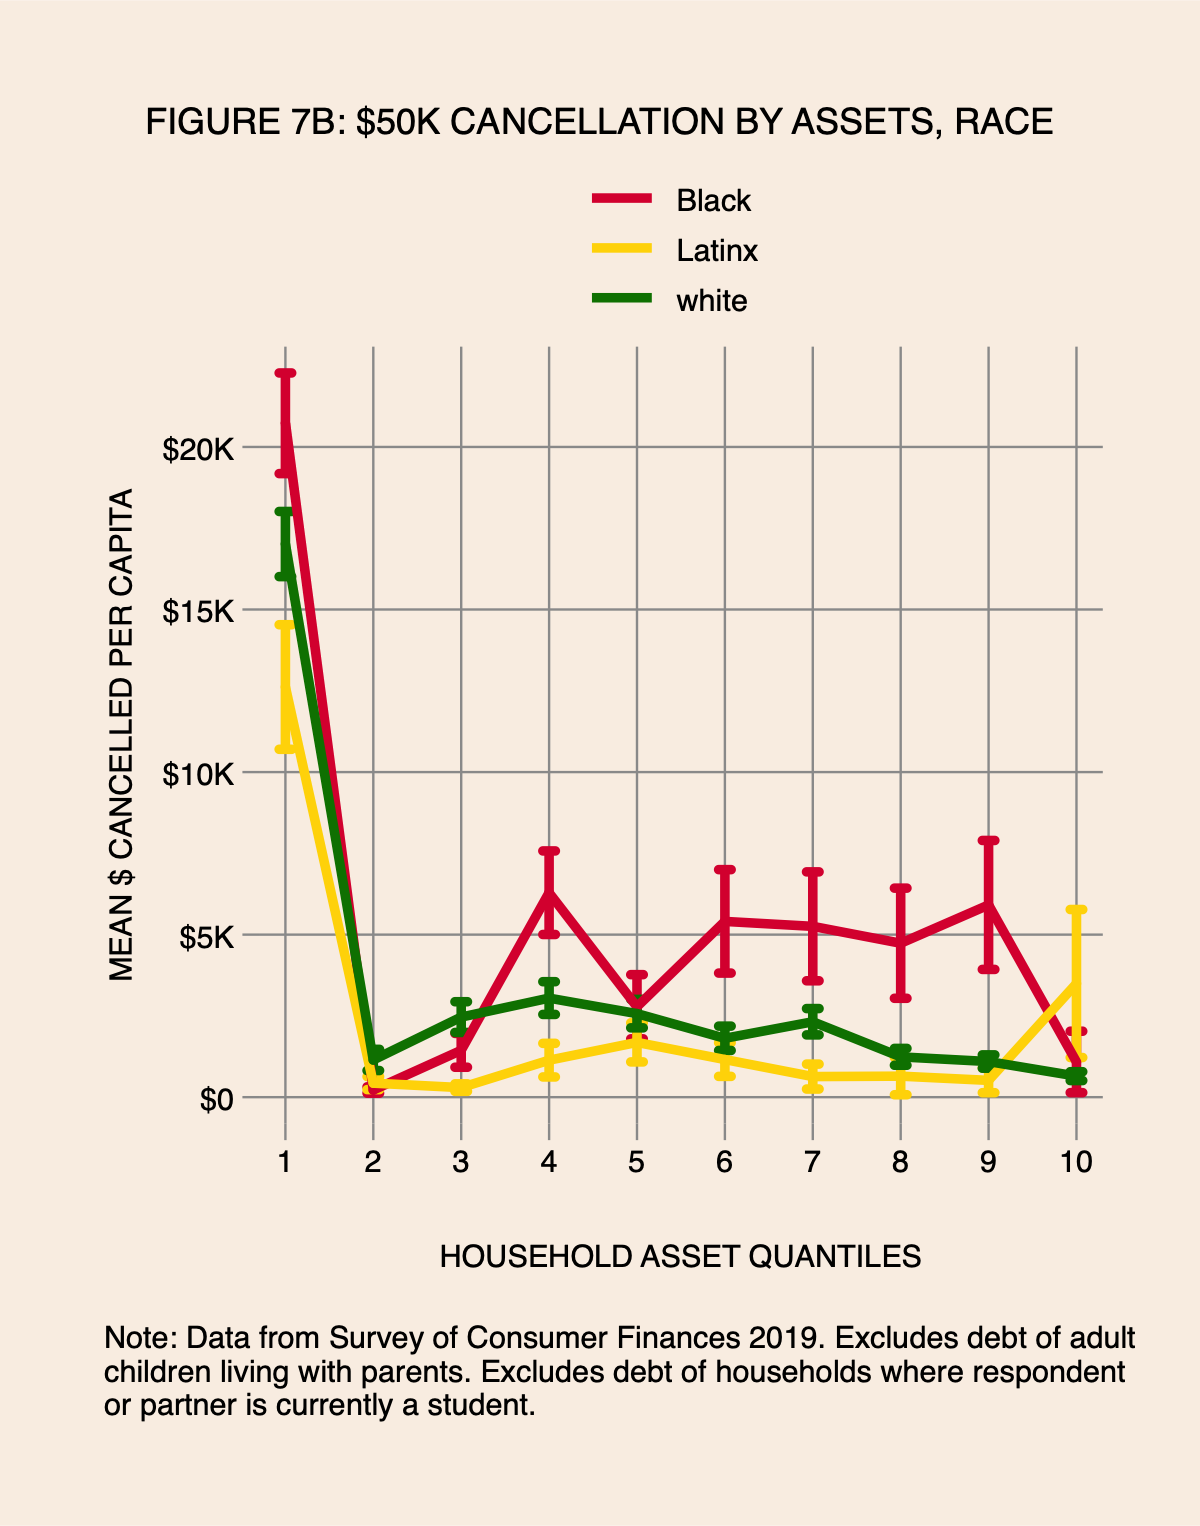

In [12]:
marginsplot, name(low, replace) graphregion(margin(large)) ///
legend(pos(12)) ///
ytitle(MEAN $ CANCELLED PER CAPITA) title("FIGURE 7B: $50K CANCELLATION BY ASSETS, RACE") ///
xscale(titlegap(large)) xtitle(HOUSEHOLD ASSET QUANTILES) graphregion(margin(large)) ///
note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of adult" ///
    "children living with parents. Excludes debt of households where respondent" ///
    "or partner is currently a student.", size(small) xoffset(0)) graphregion(margin(large)) ///
    xscale(titlegap(large)) ylabel(0 "$0" 5000 "$5K" 10000 "$10K" 15000 "$15K" 20000 "$20K") ///
    xtitle(HOUSEHOLD ASSET QUANTILES) scheme(dubois)